# Introduction to Digital Filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse

- Every linear filter has an impulse response. When discussing filters, the impulse response is called filter kernel.
- Two possible ways to make digital filters: convolution and recursion.
- The impulse response of the recursive filter is infinitely long. Hence, the recursive filters are called <strong>IIR (Infinite Impulse Response)</strong> filter.
- Filters carried out by convolution are called <strong>FIR (Finite Impulse Response)</strong> filters.

## Various filters.

- <strong>Low-pass filter</strong>: Low-pass filter allows frequency components lower than a cutoff frequency to transmit. 
- <strong>All-pass filter</strong>: Delta function is an all-pass filters.
- <strong>High-pass filter</strong>: By subtracting the low-pass filter (e.g., windowed sinc) from the all-pass filter (delta function), it is possible to get high-pass filter.
- <strong>Band-pass filter</strong>: By applying the low-pass and high-pass filter, you can make a band-pass filter. This is a convolution of the low-pass and high-pass filter kernels.
- <strong>Band-reject filter</strong>: By summing the low-pass and high-pass filter kernels, a band-reject filter can be obtained.

Video: https://www.coursera.org/lecture/dsp2/2-1-5-b-the-ideal-lowpass-filter-nqyFI

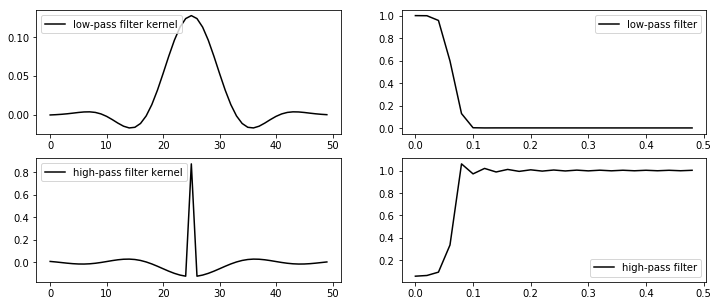

In [2]:
M=50 # number of points in the filter
omega_c=0.4 # cutoff frequency

t_filter=np.linspace(0,M-1,M) # time data for a filter

sinc_func=omega_c/np.pi*np.sinc(omega_c/np.pi*(t_filter-M/2)) # sinc function
hamming_w=0.54-0.46*np.cos(2*np.pi*t_filter/M) # hamming window
h_lowpass=sinc_func*hamming_w # low-pass filter kernel
h_highpass=unit_impulse(int(M), int(M/2))-omega_c/np.pi*np.sinc(omega_c/np.pi*(t_filter-M/2)) # high-pass filter kernel

fq=np.fft.fftfreq(M,1) # frequency

# low-pass filter kernel
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(221)
ax1.plot(h_lowpass, 'k') 
ax1.legend(['low-pass filter kernel'])

# low-pass filter
ax2=fig.add_subplot(222)
ax2.plot(fq[:int(M/2)], np.abs(np.fft.fft(h_lowpass))[:int(M/2)] , 'k')
ax2.legend(['low-pass filter'])

# high-pass filter kernel
ax3=fig.add_subplot(223)
ax3.plot(h_highpass , 'k')
ax3.legend(['high-pass filter kernel'])

# high-pass filter
ax4=fig.add_subplot(224)
ax4.plot(fq[:int(M/2)], np.abs(np.fft.fft(h_highpass))[:int(M/2)] , 'k')
ax4.legend(['high-pass filter'])


plt.show()

## Example of the low-pass and high-pass filters
This example is not based on the textbook.

In [3]:
def gaussian(amp, mu,fwhm,t):
    return amp*np.exp(-4*np.log(2)*(t-mu)*(t-mu)/fwhm/fwhm)

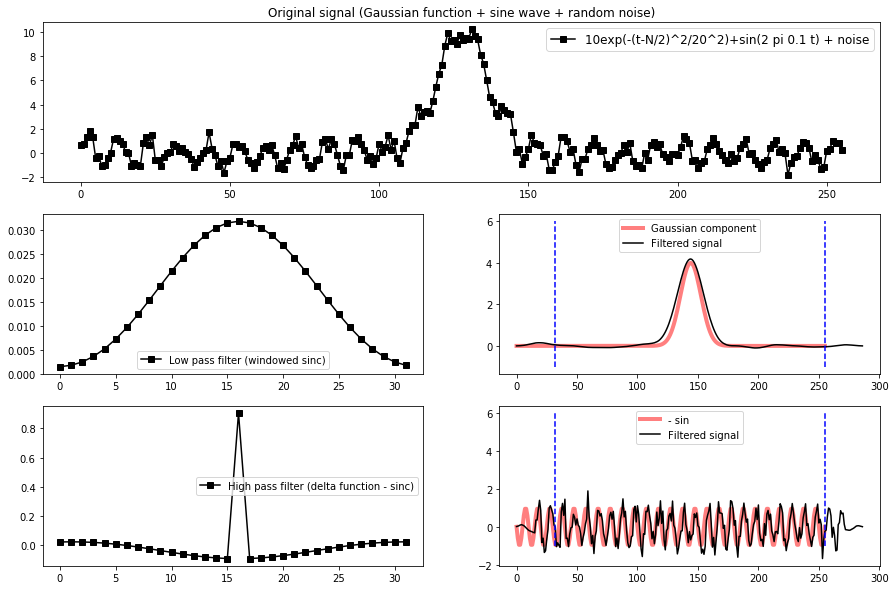

In [4]:
N=256 # number of points in the input signal
M=32 # number of points in the filter

width=20 # full width of half maximum for a Gaussian function
f=0.1 # frequency of oscilatory signal

np.random.seed(0) # random seed

t=np.linspace(0,N-1,N) # time data for the signal

t_filter=np.linspace(0,M-1,M) # time data for a filter
omega_c=0.1 # cutoff frequency for low pass filter
sinc_func=omega_c/np.pi*np.sinc(omega_c/np.pi*(t_filter-M/2))
hamming_w=0.54-0.46*np.cos(2*np.pi*t_filter/M)
h_lowpass=sinc_func*hamming_w


omega_c=0.3 # cutoff frequency for high pass filter 
h_highpass=unit_impulse(int(M), int(M/2))-omega_c/np.pi*np.sinc(omega_c/np.pi*(t_filter-M/2))


# Input signal
x = gaussian(10,N/2,width,t) + np.sin(2*np.pi*f*t) + np.random.normal(loc=0,scale=0.4,size=t.shape[0])

fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(311)
ax1.plot(t,x, marker='s', color='black') 
ax1.set_title("Original signal (Gaussian function + sine wave + random noise)")
ax1.legend(['10exp(-(t-N/2)^2/20^2)+sin(2 pi 0.1 t) + noise'], fontsize=12)

ax2=fig.add_subplot(323)
ax2.plot(t_filter,h_lowpass,marker='s',color='k')
ax2.legend(["Low pass filter (windowed sinc)"])

y=np.convolve(x,h_lowpass)
ax3=fig.add_subplot(324)
ax3.plot(gaussian(4,M/2+N/2,20,t), alpha=0.5, color='red', linewidth=4)
ax3.plot(y, color='k')
ax3.legend(['Gaussian component','Filtered signal'])
ax3.plot(np.array([y.shape[0]-M,y.shape[0]-M]),np.array([-1,6]), '--', color='blue')
ax3.plot(np.array([M,M]),np.array([-1,6]), '--',color='blue')


ax4=fig.add_subplot(325)
ax4.plot(t_filter,h_highpass, color='black', marker='s')
ax4.legend(['High pass filter (delta function - sinc)'])

y=np.convolve(x,h_highpass)
ax5=fig.add_subplot(326)
ax5.plot(-np.sin(2*np.pi*f*t), alpha=0.5, color='red', linewidth=4) 
ax5.plot(y, color='black')
ax5.legend(['- sin','Filtered signal'])
ax5.plot(np.array([M,M]),np.array([-1,6]), '--', color='blue')
ax5.plot(np.array([y.shape[0]-M,y.shape[0]-M]),np.array([-1,6]), '--', color='blue')


plt.show()